## Human Activity Recognition with Smartphone

Steps describing project
* Import the necessary Libraries
* Load and analyse the data
* Find Correlations among the faetures
* Split the data into train and test data(validation data)
* Predict the activity using Logistic Regression and RandomForestClassifier and other Classification Models
* Calculate the Classification error metrics
* Conclusion and submission

### Dataset info
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

data_set origin: UCI Repository
Link: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

## Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

## Loading and analysis of data

In [24]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [25]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [26]:
test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [27]:
train_data.shape

(7352, 563)

In [28]:
test_data.shape

(2947, 563)

In [29]:
train_data.head(100)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.327317,-0.022256,-0.149144,-0.248645,0.133229,-0.179547,-0.306979,0.113994,-0.159712,-0.114953,...,-0.422166,-0.438911,-0.710035,0.121018,-0.023408,-0.769477,0.256167,0.038575,1,WALKING
96,0.349059,-0.022004,-0.150052,-0.303125,0.152607,-0.174298,-0.356618,0.106512,-0.141309,-0.178067,...,-0.493845,-0.538717,0.833200,0.457682,0.211527,-0.776736,0.251406,0.036180,1,WALKING
97,0.264682,-0.008592,-0.102974,-0.363238,0.036867,-0.244159,-0.425625,-0.055041,-0.243230,-0.278328,...,-0.569276,0.460655,0.765162,0.424757,0.167463,-0.786963,0.244471,0.034677,1,WALKING
98,0.284317,-0.027206,-0.212303,-0.183444,0.141076,-0.225689,-0.249080,0.110614,-0.221009,0.032522,...,-0.551872,-0.053158,0.512810,-0.811518,0.581624,-0.764185,0.260565,0.031442,1,WALKING


In [30]:
test_data.head(100)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.333144,-0.043447,-0.126199,-0.363243,-0.096309,-0.390384,-0.392519,-0.054608,-0.346235,-0.308076,...,-0.597883,-0.595655,0.649387,0.929541,0.201193,-0.670149,0.325928,0.011316,2,WALKING
96,0.229817,-0.002648,-0.082071,-0.363851,-0.084508,-0.402263,-0.404570,-0.063882,-0.358038,-0.276923,...,-0.591007,0.569305,-0.018620,0.883205,0.142855,-0.665279,0.329157,0.007599,2,WALKING
97,0.237483,0.002197,-0.048945,-0.413528,-0.167172,-0.412760,-0.458383,-0.179721,-0.377971,-0.276923,...,-0.477783,0.305959,-0.979326,-0.070407,-0.884617,-0.673486,0.323130,0.001461,2,WALKING
98,0.331505,-0.036584,-0.108867,-0.414613,-0.160494,-0.426631,-0.449018,-0.190022,-0.406173,-0.330388,...,-0.601577,-0.728590,-0.111346,-0.882833,-0.913951,-0.677672,0.319940,-0.002189,2,WALKING


## Encoding dependent variable

In [31]:
le = LabelEncoder()
for x in [train_data, test_data]:
    x['Activity'] = le.fit_transform(x.Activity)

In [32]:
#Check for null values
train_data.isnull().values.any()

False

In [33]:
test_data.isnull().values.any()

False

Subject column is not going to useful for the model so we will drop it

In [34]:
train_data.drop('subject', axis =1, inplace=True)
test_data.drop('subject', axis =1, inplace=True)

## Finding co-relation between features

In [35]:
feature_cols = train_data.columns[: -1]   #exclude the Activity column
#Calculate the correlation values
correlated_values = train_data[feature_cols].corr()
#stack the data and convert to a dataframe

correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
correlated_values.head()

,Feature_1,Feature_2,Correlations
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903


In [36]:
#create an abs_correlation column
correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
correlated_values.head()

,Feature_1,Feature_2,Correlations,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952,0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903,0.021903


In [37]:
#Picking most correlated features
train_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation>0.8')
train_fields.sample(5)

,Feature_1,Feature_2,Correlations,abs_correlation
91810,tBodyGyroJerk-std()-X,fBodyAccJerk-entropy()-Y,0.920744,0.920744
161026,fBodyAcc-entropy()-X,tBodyAcc-iqr()-X,0.908607,0.908607
121190,tGravityAccMag-max(),tBodyAcc-min()-Z,-0.882557,0.882557
160726,fBodyAcc-iqr()-Z,fBodyAcc-sma(),0.930383,0.930383
73720,tBodyGyro-max()-Z,tBodyAccJerkMag-max(),0.880958,0.880958


## Training and validating data

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

#Getting the split indexes

split_data = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
train_idx, val_idx = next(split_data.split(train_data[feature_cols], train_data.Activity))

#creating the dataframes

x_train = train_data.loc[train_idx, feature_cols]
y_train = train_data.loc[train_idx, 'Activity']

x_val = train_data.loc[val_idx, feature_cols]
y_val = train_data.loc[val_idx, 'Activity']

## Predictive Modelling

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators = 10)
dt = DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
gnb = GaussianNB()



lr = lr.fit(x_train, y_train)

rf = rf.fit(x_train, y_train)

dt = dt.fit(x_train, y_train)

knn = knn.fit(x_train, y_train)

gnb = gnb.fit(x_train, y_train)

/Users/nikhilkalyan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
y_predict = list()
y_proba = list()

labels = ['lr', 'dt', 'rf', 'knn', 'gnb']
models = [lr, dt, rf, knn, gnb]

for lab, mod in zip(labels, models):
    y_predict.append(pd.Series(mod.predict(x_val), name = lab))
    y_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))
    #.max(axis = 1) for a 1 dimensional dataframe

y_predict = pd.concat(y_predict, axis = 1)
y_proba = pd.concat(y_proba, axis = 1)

y_predict.head(100)

,lr,dt,rf,knn,gnb
0,0,0,0,0,1
1,5,5,5,5,5
2,1,1,1,1,1
3,0,0,0,0,0
4,3,5,3,3,3
...,...,...,...,...,...
95,5,3,5,5,5
96,4,4,4,4,5
97,2,2,2,2,2
98,1,1,1,2,2


In [43]:
y_proba.head(100)

,lr,dt,rf,knn,gnb
0,0.997094,1.0,1.0,1.0,0.833956
1,0.992243,1.0,1.0,1.0,1.000000
2,0.994266,1.0,0.9,1.0,1.000000
3,0.999999,1.0,0.9,1.0,1.000000
4,0.985674,1.0,1.0,1.0,1.000000
...,...,...,...,...,...
95,0.998540,1.0,0.8,1.0,1.000000
96,0.964737,1.0,0.6,1.0,1.000000
97,0.993746,1.0,1.0,1.0,1.000000
98,0.990833,1.0,0.8,0.6,0.931421


In [88]:
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score

metrics = list()
confusion_m = dict()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y_val, y_predict[lab], average = 'weighted')
    
    accuracy = accuracy_score(y_val, y_predict[lab])
    
    confusion_m[lab] = confusion_matrix(y_val, y_predict[lab])
    
    metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
metrics= pd.concat(metrics, axis =1)

In [89]:
metrics

,lr,dt,rf,knn,gnb
Precision,0.984601,0.943707,0.974139,0.959444,0.825454
Recall,0.984587,0.942883,0.974161,0.957842,0.810517
F_score,0.984585,0.942882,0.974147,0.957606,0.809600
Accuracy,0.984587,0.942883,0.974161,0.957842,0.810517


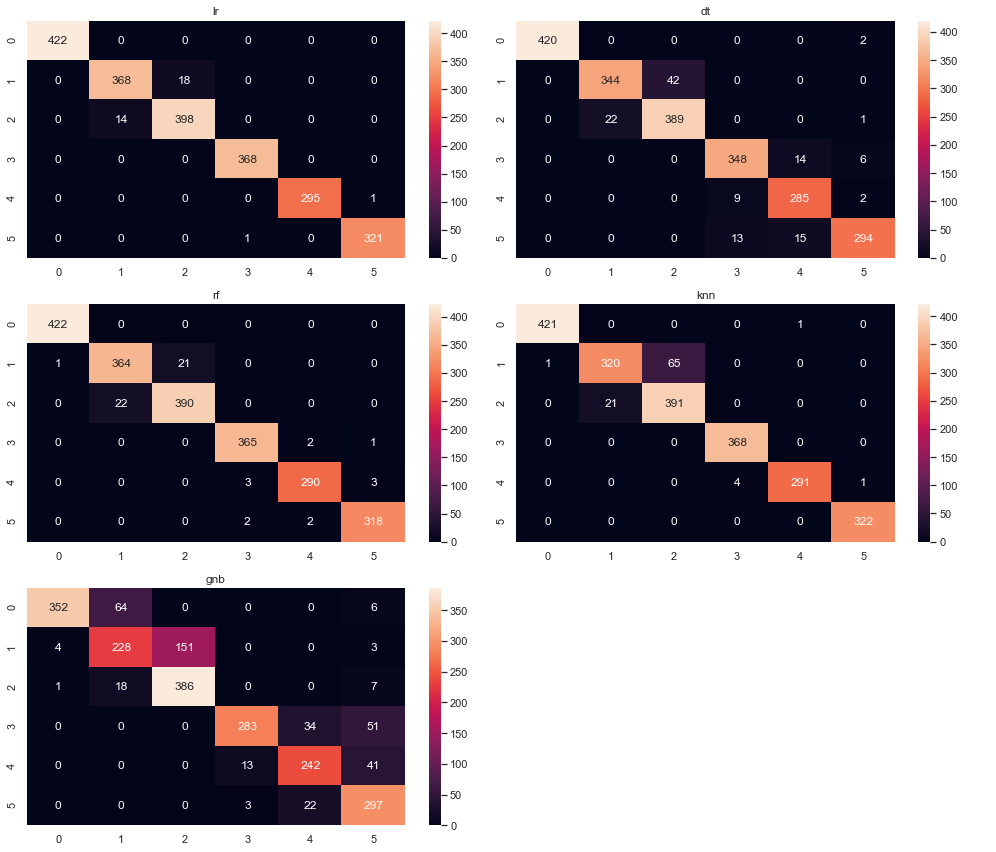

In [114]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(14, 12)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], labels):
    sb.heatmap(confusion_m[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

We can see that the Logistic regression gives better error metric than the other models. And Accuracy score of Logistic regression is better than all and it predicted accuracy is 98%